## Předvýběr území na základě limitujících podmínek
Karolína Fenclová, Diplomová práce

Skript pro analýzu hodnot pro základní kritéria

In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import pandas as pd

### 5170 variant (vně ČR a UTM33, průsečík s železnicí a rozvodnicí) > řádovost toků

In [2]:
# UTM 33 AND within Cesko AND intersect zeleznice
# predvyber = zeleznice 3-10 km, zastavba 0.2 - 2 km2, relief < 62500 m2

# Již aplikováno:
#PODMÍNKA: délka železnice
zeleznice_delka_min = 3000
zeleznice_delka_max = 10000

# PODMÍNKA: výskyt zástavby
zastavba_rozloha_min = 0.2*1000*1000 #0,2 km2 ve skutečnosti (velmi řídké osídlení)
zastavba_rozloha_max = 2*1000*1000   #2km2 ve skutečnosti (1/8 území) 2cm2 v mapě 1 : 50 000 2*(2*500)**2

# PODMÍNKA: maximalni povolena rozloha skal a povrchové těžby
relief_rozloha_max = 1*250*250 # 1cm2 v mapě 1 : 25 000



In [3]:
# data absolutní řádovost vodních toků 
radovost_toku = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\0_radovost_toku.csv").set_index('ID')

In [4]:
radovost_toku.describe()

,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
count,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000
mean,14234.115431,133.259712,105.565304,1022.268275,2571.314528,3699.633373,3139.217617,1960.419077,1028.011431,437.430315,116.866551,20.129379
std,6495.024388,983.893570,663.619719,2163.404889,3246.395031,3520.023317,3363.779035,2771.148656,2151.618333,1320.874156,627.458820,243.929527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10056.977500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14129.530000,0.000000,0.000000,0.000000,837.425000,3321.175000,2160.280000,600.420000,0.000000,0.000000,0.000000,0.000000
75%,18119.897500,0.000000,0.000000,0.000000,4764.980000,6105.757500,5250.990000,3286.627500,810.310000,0.000000,0.000000,0.000000
max,45726.580000,29096.850000,7924.080000,14739.340000,19692.960000,19646.560000,18356.480000,16117.320000,14667.370000,10971.760000,10393.970000,8985.710000


In [5]:
# funkce sečte kolik řádů má délku větší 500 m
def pocet_radu(radek):
    return len(filter(lambda x: x>500, list(radek)[3:]))

# vytvoř nový sloupec počet řádů
pocet_radu = radovost_toku.apply(pocet_radu, axis=1)
radovost_toku["pocet_radu"] = pocet_radu

In [6]:
radovost_toku.head()

,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,pocet_radu
ID,,,,,,,,,,,,,
14,17394.68,762.97,0.0,0.0,0.00,8409.72,4785.93,3436.05,0.00,0.00,0.00,0.0,3
25,18035.44,0.00,0.0,0.0,0.00,7915.01,8463.53,1656.90,0.00,0.00,0.00,0.0,3
38,17475.16,0.00,0.0,0.0,4325.05,6930.02,4965.09,1254.99,0.00,0.00,0.00,0.0,4
40,24002.05,0.00,0.0,0.0,0.00,0.00,8275.27,9726.37,2938.44,2002.66,1059.31,0.0,5
43,9391.67,0.00,0.0,0.0,3780.89,5610.78,0.00,0.00,0.00,0.00,0.00,0.0,2


In [7]:
# Aplikace podmínky na předvýběr na základě řádovosti vodních toků
radovost_toku_predvyber = radovost_toku[(radovost_toku.r0 <= 1000)
                                       & (radovost_toku.pocet_radu >= 2) # minimum řádů
                                       & (radovost_toku.pocet_radu <= 5) # max jsou 4, ale lze vypustit, ev. možné "odnože" dibavod
                                       & (radovost_toku.celkova_delka >= 5000) # chci min hlavní tok v území
                                       ]
radovost_toku_predvyber.describe()

,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,pocet_radu
count,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000
mean,15095.160454,12.852357,92.031829,1058.386541,2752.111981,4057.308099,3426.581820,2094.445237,1070.164595,434.860763,88.269273,8.148115,3.345707
std,5587.454093,94.501304,616.168721,2200.531218,3327.008525,3547.633863,3405.904722,2810.576940,2199.394585,1328.327035,489.219499,96.438686,0.844620
min,5004.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,11237.955000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,14577.875000,0.000000,0.000000,0.000000,1275.995000,3942.870000,2580.380000,786.460000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,18313.565000,0.000000,0.000000,0.000000,5030.870000,6440.515000,5549.307500,3524.267500,851.612500,0.000000,0.000000,0.000000,4.000000
max,45726.580000,993.610000,7924.080000,14739.340000,19692.960000,19646.560000,18356.480000,16117.320000,14667.370000,10971.760000,8325.100000,2212.720000,5.000000


In [8]:
# funkce vrátí 1=True pokud ID splňuje podmínku
def splnuje (radek):
    return 1
    
radovost_toku_true = radovost_toku_predvyber.apply(splnuje, axis=1).to_frame()
radovost_toku_true.columns = ['radovost_ANO']
radovost_toku_true.head()

,radovost_ANO
ID,
14,1
25,1
38,1
40,1
43,1


In [9]:
# nový data frame
radovost_export = radovost_toku_predvyber[["celkova_delka", "pocet_radu"]].join(radovost_toku_true)
radovost_export.describe()

,celkova_delka,pocet_radu,radovost_ANO
count,4472.000000,4472.000000,4472.0
mean,15095.160454,3.345707,1.0
std,5587.454093,0.844620,0.0
min,5004.520000,2.000000,1.0
25%,11237.955000,3.000000,1.0
50%,14577.875000,3.000000,1.0
75%,18313.565000,4.000000,1.0
max,45726.580000,5.000000,1.0


In [10]:
# ulozim dataframe jako novy csv soubor
radovost_export.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_0_radovost_toku4472.csv")

### 4472 variant > výběr toku, který dělí území na 1/2 - 1/4 

In [11]:
# načtení dat
tok = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\0_predvyber_vodni_tok.csv", delimiter =";").set_index("ID")
tok.head()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku
ID,,,,
14,0,14,172.06,8
25,0,10,25.00,8
38,0,40,12.40,10
40,0,108,8.44,10
43,6,16,6.60,10


In [12]:
tok.describe()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku
count,4571.000000,4571.000000,4.571000e+03,4571.000000
mean,2.909867,28.231897,1.004044e+03,13.456137
std,7.473496,28.285324,2.340527e+04,6.607534
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,10.000000,1.440000e+00,9.000000
50%,0.000000,20.000000,3.160000e+00,14.000000
75%,0.000000,36.000000,1.151000e+01,18.000000
max,132.000000,418.000000,1.444386e+06,39.000000


In [13]:
# vyřazení duplicit podle ID (z důvodu výpočtu na více počítačích)
tok = tok[~tok.index.duplicated(keep='first')]
tok.describe()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku
count,4474.000000,4474.000000,4.474000e+03,4474.000000
mean,2.902772,28.176129,9.275435e+02,13.453733
std,7.464241,28.265735,2.321060e+04,6.608717
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,10.000000,1.440000e+00,9.000000
50%,0.000000,20.000000,3.175000e+00,14.000000
75%,0.000000,36.000000,1.166500e+01,18.000000
max,132.000000,418.000000,1.444386e+06,39.000000


Text(0.5,1,u'Pod\xedl ploch p\u0159i rozd\u011blen\xed \xfazem\xed hlavn\xedm vodn\xedm tokem')

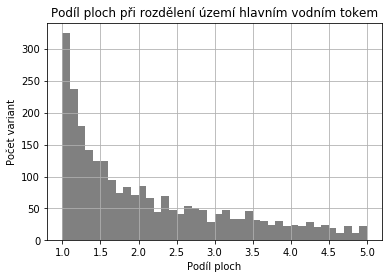

In [34]:
# histogram podílu ploch

d = tok.nejlepsi_podil_ploch[(tok.nejlepsi_podil_ploch >= 1) & (tok.nejlepsi_podil_ploch <= 5)]
dx = d.hist(bins=4*5*2, range=[1, 5], facecolor='grey', align='mid')
dx.set_xlabel('Podíl ploch')
dx.set_ylabel('Počet variant')
dx.set_title("Podíl ploch při rozdělení území hlavním vodním tokem")

Text(0.5,1,u'Z\xe1vislost po\u010dtu pr\u016fse\u010d\xedk\u016f na pod\xedlu ploch p\u0159i rozd\u011blen\xed')

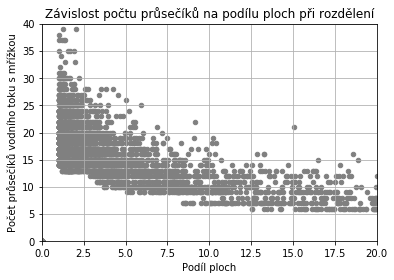

In [37]:
# graf závislosti podílu plochy an celkovém počtu průsečíků
a = tok[(tok.nejlepsi_podil_ploch <= 40)]
ax= a.plot(x='nejlepsi_podil_ploch', y='pocet_pruseciku', 
          kind='scatter', 
          ylim={0, 40}, xlim={0,20}, 
          grid=True,
          color='grey')

ax.set_xlabel('Podíl ploch')
ax.set_ylabel('Počet průsečíků vodního toku s mřížkou')
ax.set_title("Závislost počtu průsečíků na podílu ploch při rozdělení")

In [16]:
# aplikace podmínky na výběr na základě dělení plochy vodním tokem
vyber_tok = tok[(tok.nejlepsi_podil_ploch >= 1) # přesná polovina
                & (tok.nejlepsi_podil_ploch <= 3) # 1/4 území
                & (tok.pocet_pruseciku >= 10) # pojistka
                ]
vyber_tok.describe()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku
count,1991.000000,1991.000000,1991.000000,1991.000000
mean,2.660974,31.392767,1.646469,18.470618
std,7.287084,30.049146,0.557799,4.006780
min,0.000000,1.000000,1.000000,12.000000
25%,0.000000,12.000000,1.160000,15.000000
50%,0.000000,24.000000,1.480000,18.000000
75%,0.000000,40.000000,2.040000,21.000000
max,76.000000,238.000000,3.000000,39.000000


In [17]:
# funkce vrátí 1=True pokud ID splňuje podmínku
def splnuje (radek):
    return 1
    
vyber_tok_true = vyber_tok.apply(splnuje, axis=1).to_frame()
vyber_tok_true.columns = ['hlavni_tok']
vyber_tok_export = vyber_tok_true.join(tok[["nejlepsi_podil_ploch", "pocet_pruseciku"]])
vyber_tok_export.head()

,hlavni_tok,nejlepsi_podil_ploch,pocet_pruseciku
ID,,,
46,1,2.91,19
58,1,1.06,16
92,1,1.13,19
96,1,1.33,16
104,1,1.39,17


In [18]:
# ulozim dataframe jako novy csv soubor
vyber_tok_export.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_0_predvyber_vodni_tok1991.csv")

### vybráno 1991 variant pro další hodnocení